In [16]:
import pandas as pd
# eaglei = pd.read_csv('../data/cleaned_data/cleanedeaglei_cleaned.csv')
storm = pd.read_csv('../data/cleaned_data/stroemeventsfinal.csv')
coverage = pd.read_csv('../data/cleaned_data/coverage_history.csv')
dqi = pd.read_csv('../data/cleaned_data/DQI.csv')
mcc = pd.read_csv('../data/cleaned_data/MCC.csv')

In [37]:
import dask.dataframe as dd

eaglei = dd.read_csv('../data/cleaned_data/cleanedeaglei_cleaned.csv')

In [38]:
eaglei = eaglei.sample(frac=0.05, random_state=42)  

In [39]:
# Compute the sample to get a Pandas DataFrame
eaglei = eaglei.compute()

In [40]:
eaglei.head()

,Year,fips_code,county,state,customers_out,run_start_date,run_start_clock_time
938549,2014,20209,Wyandotte,Kansas,2.0,NaN,NaN
1652054,2014,51195,Wise,Virginia,1.0,NaN,NaN
823940,2014,42097,Northumberland,Pennsylvania,52.0,NaN,NaN
1621590,2014,27143,Sibley,Minnesota,6.0,NaN,NaN
1336813,2014,48157,Fort Bend,Texas,5.0,NaN,NaN


In [41]:
len(eaglei)

9556653

In [44]:
# Set pandas options to display all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Increase display width
pd.set_option('display.max_colwidth', 30)   # Limit column width for readability

# Display the storm dataframe head
storm.head()

# If you want to reset the display options later
# pd.reset_option('display.max_columns')
# pd.reset_option('display.width')
# pd.reset_option('display.max_colwidth')

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,CZ_TIMEZONE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE,BEGIN_DATE,END_DATE
0,201402,18,10:00:00,201402,18,20:00:00,83473,503953,NEW HAMPSHIRE,33,2014,February,Heavy Snow,Z,12,EASTERN HILLSBOROUGH,BOX,EST-5,0,0,0,0,0.0,0.0,Trained Spotter,0.00,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low pressure developing so...,Eight to twelve inches of ...,CSV,2014-02-18,2014-02-18
1,201403,30,08:31:00,201403,30,09:31:00,83971,507163,MASSACHUSETTS,25,2014,March,Flood,C,17,MIDDLESEX,BOX,EST-5,0,0,0,0,35000.0,0.0,Amateur Radio,0.00,Unknown,1.0,WNW,CHELMSFORD CENTER,1.0,WNW,CHELMSFORD CENTER,42.5861,-71.3472,42.5867,-71.3469,A stacked low pressure sys...,Boston Road was closed nea...,CSV,2014-03-30,2014-03-30
2,201404,27,23:06:00,201404,27,23:06:00,83517,506236,MISSOURI,29,2014,April,Hail,C,67,DOUGLAS,SGF,CST-6,0,0,0,0,0.0,0.0,Trained Spotter,0.88,Unknown,1.0,W,AVA,1.0,W,AVA,36.9500,-92.6600,36.9500,-92.6600,A powerful storm system an...,Unknown,CSV,2014-04-27,2014-04-27
3,201404,27,23:03:00,201404,27,23:03:00,83517,506237,MISSOURI,29,2014,April,Thunderstorm Wind,C,67,DOUGLAS,SGF,CST-6,0,0,0,0,10000.0,0.0,Emergency Manager,61.00,EG,1.0,W,AVA,1.0,W,AVA,36.9500,-92.6600,36.9500,-92.6600,A powerful storm system an...,Several power poles snappe...,CSV,2014-04-27,2014-04-27
4,201402,15,13:00:00,201402,15,21:00:00,83132,501499,WASHINGTON,53,2014,February,High Wind,Z,20,SOUTHWEST INTERIOR,PQR,PST-8,0,0,0,0,0.0,0.0,Official NWS Observations,75.00,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong cold front produc...,Two stations measured stro...,CSV,2014-02-15,2014-02-15


In [43]:
storm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691434 entries, 0 to 691433
Data columns (total 42 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   BEGIN_YEARMONTH    691434 non-null  int64  
 1   BEGIN_DAY          691434 non-null  int64  
 2   BEGIN_TIME         691434 non-null  object 
 3   END_YEARMONTH      691434 non-null  int64  
 4   END_DAY            691434 non-null  int64  
 5   END_TIME           691434 non-null  object 
 6   EPISODE_ID         691434 non-null  int64  
 7   EVENT_ID           691434 non-null  int64  
 8   STATE              691434 non-null  object 
 9   STATE_FIPS         691434 non-null  int64  
 10  YEAR               691434 non-null  int64  
 11  MONTH_NAME         691434 non-null  object 
 12  EVENT_TYPE         691434 non-null  object 
 13  CZ_TYPE            691434 non-null  object 
 14  CZ_FIPS            691434 non-null  int64  
 15  CZ_NAME            691434 non-null  object 
 16  WF

In [23]:
len(storm)

691434

In [24]:
coverage.head()

,year,state,total_customers,min_covered,max_covered,min_pct_covered,max_pct_covered
0,1/1/18,AK,340543,229424,229424,0.67,0.67
1,1/1/19,AK,340543,217506,229424,0.64,0.67
2,1/1/20,AK,328964,158477,224243,0.48,0.68
3,1/1/21,AK,331443,224243,226079,0.68,0.68
4,1/1/22,AK,364614,226079,258830,0.62,0.71


In [25]:
len(coverage)

280

In [26]:
dqi.head()

,fema,year,success_rate,percent_enabled,spatial_precision,cust_coverage,max_covered,total_customers,DQI
0,1,2018,97.901622,99.314809,75.017989,92.281197,6703631,7264352,70.318387
1,1,2019,99.752504,99.523138,75.080810,93.218137,6795247,7289619,90.052990
2,1,2020,99.722473,68.974422,75.055220,95.654575,7114749,7437960,61.808936
3,1,2021,99.833900,99.524848,75.078565,98.010174,7092716,7236714,94.041252
4,1,2022,99.757155,99.921440,74.522534,98.148235,7224192,7360491,93.675949


In [27]:
len(dqi)

50

In [28]:
mcc.head()

,County_FIPS,Customers
0,1001,24619
1,1003,195253
2,1005,12400
3,1007,11037
4,1009,27074


In [29]:
len(mcc)

3234

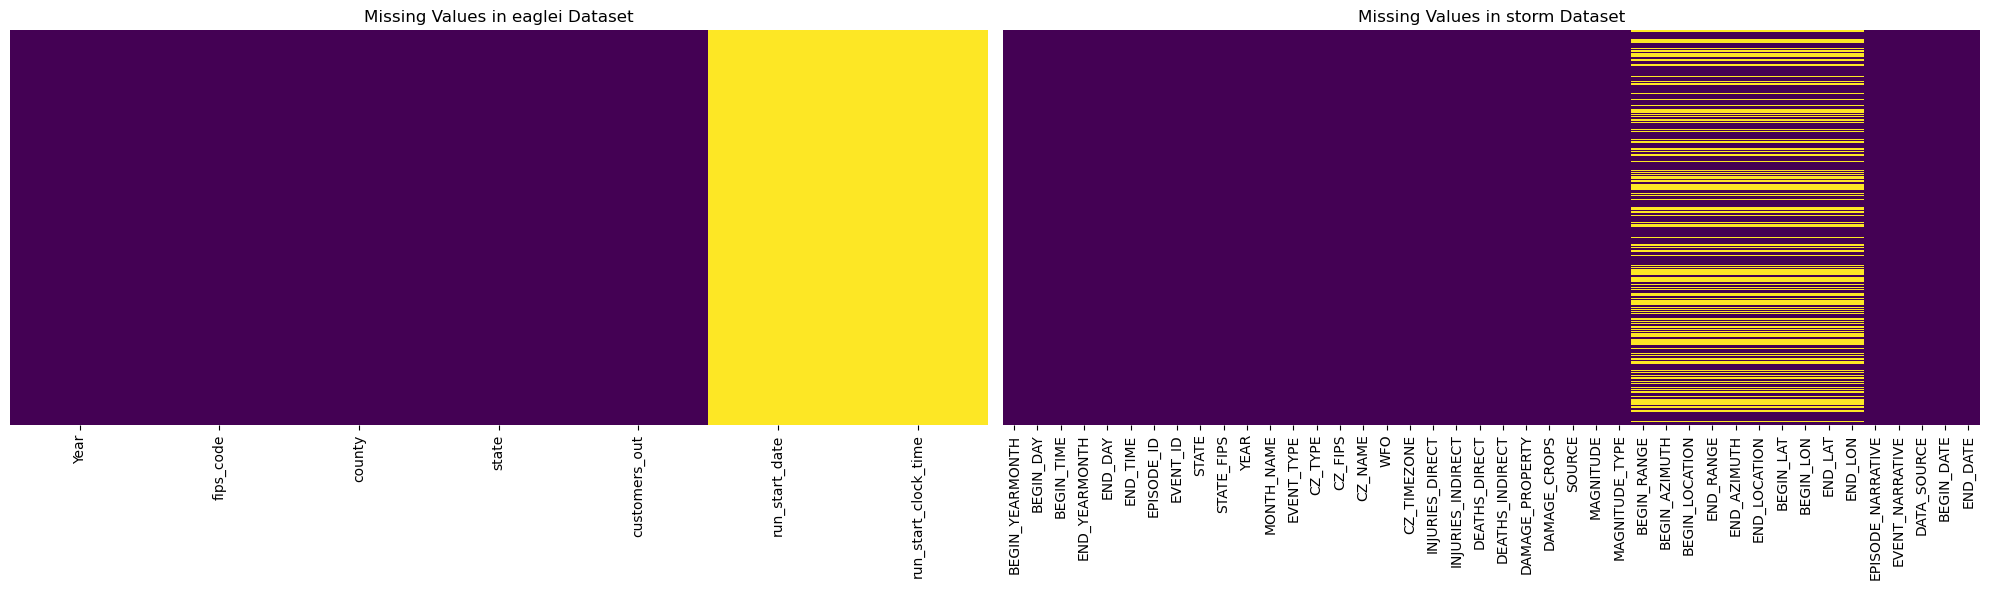

In [42]:
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.heatmap(eaglei.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=ax1)
ax1.set_title('Missing Values in eaglei Dataset')

sns.heatmap(storm.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=ax2)
ax2.set_title('Missing Values in storm Dataset')

plt.tight_layout()
plt.show()